# Production Networks

**[John Stachurski](https://johnstachurski.net)** September 2022

The study of economic networks has become very popular recently:

- production networks (Acemoglu, Azar, Carvalho, Nirei, Ozdaglah, Tahbaz-Salehi, etc.)
- financial networks (Elliot, Golub, Jackson, Pernoud, etc.)
- social networks (DeGroot, Easly, Zenou, etc.)

For an overview and references see [Sargent and Stachurski (2022)](https://networks.quantecon.org/).

In this notebook we give a quick introduction to production networks and some Python tools that can be used to analyze them.

Uncomment the following if you don't have these libraries.

In [5]:
#!pip install quantecon
#!pip install quantecon_book_networks
#!pip install pandas_datareader

We use the following imports

In [6]:
import quantecon as qe
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as plc
from matplotlib import cm

Consider an economy with $n$ sectors indexed by $i$.

The *input-output coefficient matrix* is given by 

$$
    A =
    \begin{pmatrix}
          a_{11} & a_{12} & a_{13} \\
          a_{21} & a_{22} & a_{23} \\
          a_{31} & a_{32} & a_{33}
    \end{pmatrix}
$$

Entries $a_{ij}$  are called the *input-output coefficients* and have the interpretation

\begin{equation*}
    a_{ij} = 
    \frac{\text{value of sector $j$'s inputs purchased from sector $i$}}
        {\text{total sales of sector $j$}}.
\end{equation*}

To calculate $A$ we set
 
* $x_i :=$ total sales of sector $i$.
* $z_{ij} :=$ inter-industry sales from sector $i$ to sector $j$.

Then


\begin{equation}\label{eq:leona}
    a_{ij} = \frac{z_{ij}}{x_j}
\end{equation}

We can calculate this from the data:

In [17]:
ch2_data = qbn_data.production()

In [20]:
codes = ch2_data["us_sectors_15"]["codes"]
Z = ch2_data["us_sectors_15"]["adjacency_matrix"]
x = ch2_data["us_sectors_15"]["total_industry_sales"]

In [32]:
def build_coefficient_matrix(Z, x):
    """
    Build coefficient matrix  A[i, j] = Z[i, j] / x[j] 
    
    """
    A = np.empty_like(Z)
    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            A[i, j] = Z[i, j] / x[j]
    return A

A = build_coefficient_matrix(Z, x)

In [44]:

np.set_printoptions(suppress=True)
print(np.array_str(A, precision=3))

[[0.254 0.    0.    0.002 0.052 0.001 0.003 0.    0.    0.    0.001 0.
  0.006 0.    0.002]
 [0.006 0.102 0.081 0.017 0.059 0.    0.    0.    0.    0.    0.    0.
  0.001 0.001 0.01 ]
 [0.01  0.016 0.045 0.003 0.009 0.007 0.017 0.009 0.003 0.015 0.004 0.006
  0.018 0.005 0.007]
 [0.004 0.006 0.014 0.    0.002 0.001 0.002 0.004 0.001 0.022 0.    0.001
  0.002 0.005 0.023]
 [0.245 0.15  0.049 0.35  0.393 0.044 0.048 0.107 0.062 0.016 0.049 0.088
  0.094 0.104 0.128]
 [0.003 0.    0.002 0.    0.004 0.021 0.01  0.    0.001 0.001 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.
  0.    0.    0.   ]
 [0.001 0.005 0.021 0.001 0.009 0.039 0.039 0.11  0.011 0.006 0.015 0.008
  0.007 0.007 0.012]
 [0.001 0.004 0.006 0.005 0.004 0.012 0.015 0.01  0.122 0.01  0.028 0.014
  0.015 0.025 0.026]
 [0.074 0.074 0.027 0.034 0.017 0.091 0.12  0.102 0.046 0.195 0.07  0.111
  0.102 0.115 0.047]
 [0.008 0.103 0.058 0.052 0.06  0.15  0.125 0.076 0.136 0.086 

In [45]:
_x = np.reshape(x, (1, len(x)))
_A = Z / _x

In [46]:
np.all(_A == A)

True

In [47]:
qbn_plt.plot_graph??

NameError: name 'node_size_multiple' is not defined

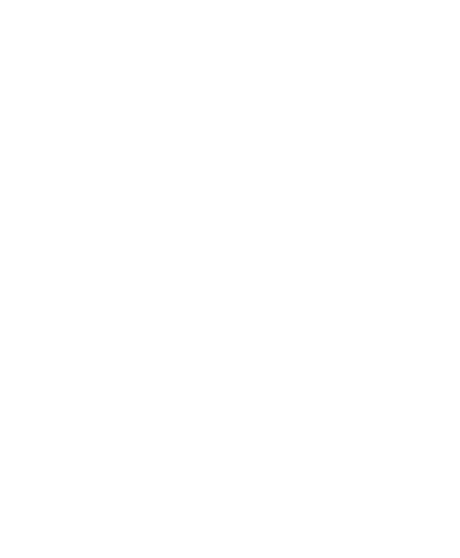

In [49]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")
G = nx.DiGraph()
N = len(A)

# Add nodes, with weights by sales of the sector
for i, w in enumerate(x):
    G.add_node(codes[i], weight=w, name=codes[i])

node_sizes = X * node_size_multiple

node_pos_dict = nx.spring_layout(G, seed=1234)


# Add the edges, along with their colors and widths
edge_colors = []
edge_widths = []
for i in range(N):
    for j in range(N):
        a = A[i, j]
        G.add_edge(codes[i], codes[j])
        edge_colors.append(node_color_list[i])
        width = a * edge_size_multiple
        edge_widths.append(width)

# Get rid of self-loops
G.remove_edges_from(nx.selfloop_edges(G))         

# Plot the networks
nx.draw_networkx_nodes(G, 
                       node_pos_dict, 
                       node_color=node_color_list, 
                       node_size=node_sizes, 
                       edgecolors='grey', 
                       linewidths=2, 
                       alpha=0.6, 
                       ax=ax)

nx.draw_networkx_labels(G, 
                        node_pos_dict, 
                        font_size=10, 
                        ax=ax)

nx.draw_networkx_edges(G, 
                       node_pos_dict, 
                       edge_color=edge_colors, 
                       width=edge_widths, 
                       arrows=True, 
                       arrowsize=20, 
                       alpha=0.6,  
                       ax=ax, 
                       arrowstyle='->', 
                       node_size=node_sizes, 
                       connectionstyle='arc3,rad=0.15')

plt.show()


We set
 
* $d_i :=$ final consumer demand for good $i$.
* $x_i :=$ total sales of sector $i$.
* $z_{ij} :=$ inter-industry sales from sector $i$ to sector $j$.
 
For each sector $i$ we have the accounting identity

\begin{equation}\label{eq:sales}
    x_i = \sum_{j=1}^n z_{ij} + d_i,
\end{equation}

which states that total sales are divided between sales to other industries
and sales to final consumers.

In [12]:
from IPython.display import IFrame
IFrame("tikz/io_reducible.pdf", width=300, height=300)



Hence

\begin{equation}\label{eq:iorcon}
    x_i = \sum_{j=1}^n a_{ij} x_j + d_i,
    \qquad i = 1, \ldots n.
\end{equation}


The first term on the right hand side is the amount of good $i$ required as
inputs when the output vector is $x := (x_i)_{i=1}^n$.

We can combine the $n$ equations into the linear system

\begin{equation}\label{eq:nnlinsys}
    x = A x + d.
\end{equation}

In [11]:
centrality = qbn_io.eigenvector_centrality(A)

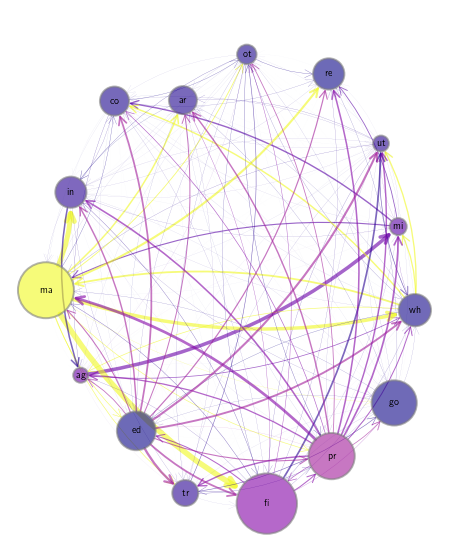

In [12]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")
color_list = qbn_io.colorise_weights(centrality,beta=False) 

qbn_plt.plot_graph(A, X, ax, codes, 
              layout_type='spring',
              layout_seed=5432167,
              tol=0.0,
              node_color_list=color_list) 
plt.show()


Here are the codes:

| code | sector |
|------|--------|
| ag | Agriculture, forestry, fishing, and hunting |
| mi |  Mining |
| ut | Utilities | 
| co | Construction |
| ma | Manufacturing |
| wh | Wholesale trade | 
| re | Retail trade |
| tr | Transportation and warehousing |
| in | Information |
| fi | Finance, insurance, real estate, rental, and leasing |
| pr | Professional and business services |
| ed | Educational services, health care, and social assistance |
| ar | Arts, entertainment, accommodation, and food services |
| ot | Other services, except government |
| go | Government |
